# TREINO DO CLASSIFICADOR

* Importação das bibliotecas necessárias para rodar o script:


In [9]:
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

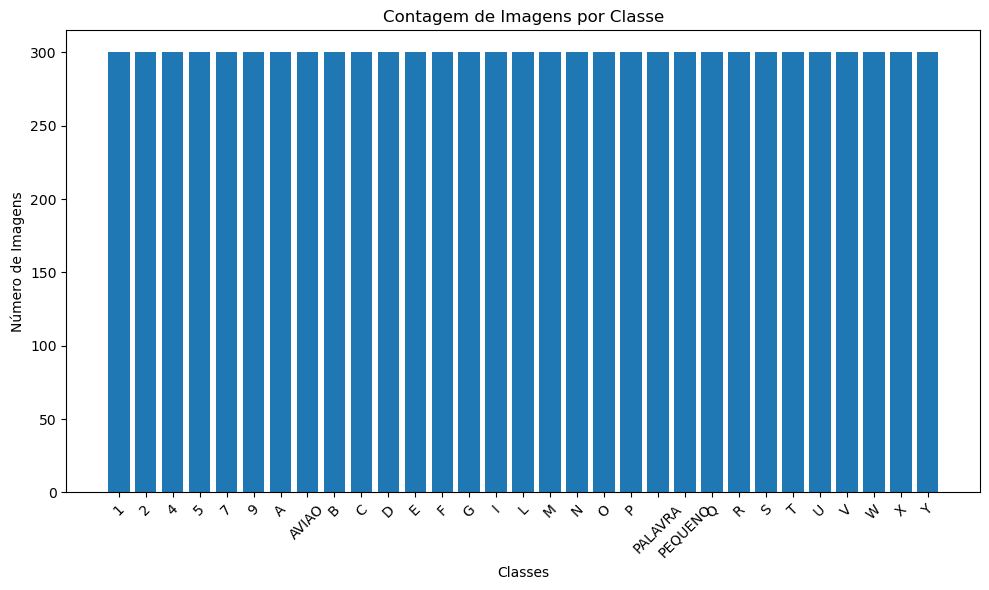

In [10]:
import os
import matplotlib.pyplot as plt

# Defina o caminho para a pasta raiz do seu dataset
pasta_raiz = './data'

# Inicialize um dicionário para contar o número de imagens em cada classe
contagem_por_classe = {}

# Percorra todas as subpastas
for classe in os.listdir(pasta_raiz):
    pasta_classe = os.path.join(pasta_raiz, classe)
    
    # Verifique se é um diretório
    if os.path.isdir(pasta_classe):
        # Conte o número de arquivos na pasta da classe
        num_arquivos = len(os.listdir(pasta_classe))
        
        # Armazene a contagem no dicionário
        contagem_por_classe[classe] = num_arquivos

# Extraia as classes e as contagens para o gráfico
classes = list(contagem_por_classe.keys())
contagens = list(contagem_por_classe.values())

# Crie um gráfico de barras para mostrar a contagem
plt.figure(figsize=(10, 6))
plt.bar(classes, contagens)
plt.xlabel('Classes')
plt.ylabel('Número de Imagens')
plt.title('Contagem de Imagens por Classe')
plt.xticks(rotation=45)
plt.tight_layout()

# Exiba o gráfico
plt.show()


* Carrega o arquivo data.pickle gerado pelo script DataSet

In [11]:
data_dict = pickle.load(open('./data.pickle', 'rb'))

* Mostra uma parte do que existe dentro do arquivo

In [12]:
data_dict

{'data': [[0.0,
   0.4723263084888458,
   0.019689053297042847,
   0.3308084309101105,
   0.07079209387302399,
   0.19458261132240295,
   0.1120544821023941,
   0.0863969624042511,
   0.11746414005756378,
   0.0,
   0.14994452893733978,
   0.22122517228126526,
   0.2500813454389572,
   0.23715892434120178,
   0.22021250426769257,
   0.2673855721950531,
   0.1772722452878952,
   0.2707025706768036,
   0.17100806534290314,
   0.30240532755851746,
   0.2602631002664566,
   0.2997424900531769,
   0.22653205692768097,
   0.3233022391796112,
   0.18729476630687714,
   0.3291566073894501,
   0.1832410842180252,
   0.3879987299442291,
   0.2623421400785446,
   0.3694729506969452,
   0.22980333864688873,
   0.3879159986972809,
   0.1930549293756485,
   0.3978215157985687,
   0.18790246546268463,
   0.4705865681171417,
   0.24985961616039276,
   0.43709734082221985,
   0.22047744691371918,
   0.44989702105522156,
   0.1924867182970047,
   0.4627813398838043],
  [0.0,
   0.47533655166625977,
   0

* "data_dict" é um dicionário que contém duas chaves: 'data' e 'labels'. </br>
* A chave 'data' é associada a uma lista contendo os dados de rastreamento. </br>
* A chave 'labels' é associada a uma lista contendo as etiquetas correspondentes aos dados de rastreamento. </br>
* Converte as listas de dados de rastreamento ('data') e etiquetas ('labels') em arrays NumPy, tornando-os mais adequados para manipulação e processamento posterior.\n

In [13]:
data = np.asarray(data_dict['data'])
labels = np.asarray(data_dict['labels'])

* Esse trecho de código divide os dados de rastreamento (data) e as etiquetas (labels) em conjuntos de treinamento e teste, garantindo que a distribuição das labels seja mantida e permitindo avaliar o modelo com dados não vistos durante o treinamento. O tamanho do conjunto de teste é de 20% e as fotos estarão todas misturadas devido ao parametro shuffle estar como verdadeiro.

In [14]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, shuffle=True, stratify=labels)

* Abaixo está sendo criado um objeto de modelo RandomForestClassifier com os parâmetros especificados. O RandomForestClassifier é um algoritmo de aprendizado de máquina baseado em árvores de decisão.</br>
Os parâmetros utilizados na criação do modelo são:</br>

* <b>n_estimators=1000</b>:</br> Especifica o número de árvores na floresta aleatória. Neste caso, são utilizadas 1000 árvores.</br>
* <b>max_depth=15</b>:</br> Define a profundidade máxima das árvores de decisão. Neste caso, a profundidade máxima é limitada a 15 níveis.</br>
* <b>min_samples_split=5</b>:</br> Define o número mínimo de amostras necessárias para que um nó seja dividido durante a construção da árvore. Aqui, um nó só será dividido se tiver pelo menos 5 amostras.</br>
* <b>criterion='entropy'</b>:</br> Especifica o critério utilizado para medir a qualidade da divisão dos nós da árvore. Neste caso, é utilizada a entropia como critério.</br>
* <b>bootstrap=False</b>:</br> Indica se as amostras devem ser amostradas com reposição (bootstrap) ao construir as árvores. Neste caso, o bootstrap é desativado, ou seja, as amostras são selecionadas sem reposição.</br>
* <b>min_samples_leaf=20</b>:</br> Define o número mínimo de amostras necessárias em uma folha da árvore. Neste caso, uma folha só será criada se tiver pelo menos 20 amostras.</br>
* <b>max_features='log2'</b>:</br> Define a estratégia para determinar o número máximo de features consideradas ao procurar a melhor divisão em cada nó. Neste caso, é utilizado o logaritmo na base 2 do número total de features.</br>
* <b>random_state=42</b>:</br> Define a semente utilizada pelo gerador de números aleatórios para garantir a reprodutibilidade dos resultados. Aqui, o número 42 é usado como semente.</br>
* <b>class_weight='balanced'</b>:</br> Especifica o peso atribuído às classes durante o treinamento do modelo. O valor 'balanced' ajusta automaticamente os pesos das classes de forma inversamente proporcional às frequências das classes nos dados de treinamento.

In [15]:
model = RandomForestClassifier(
    n_estimators=900,
    max_depth=7,
    min_samples_split=3,
     criterion='entropy',
     bootstrap=True,
    min_samples_leaf=20,
    max_features='log2',
    random_state=42,
    class_weight='balanced'
)

In [ ]:
model = RandomForestClassifier(
    n_estimators=900,      # Aumentar o número de estimadores para melhorar a acurácia
    max_depth=5,          #Decrease the max depth to avoid overfitting # Diminuir a profundidade máxima para evitar overfitting
    min_samples_split=3,   
    criterion='entropy',    
    bootstrap=True,        # bootstrap=True para aleatório
    min_samples_leaf=1,    
    max_features='sqrt',   
    random_state=42,
    class_weight='balanced'
)

* Realiza o treinamento do modelo model com os dados de treinamento (x_train e y_train), permitindo que o modelo aprenda a relação entre as features de entrada e as etiquetas de saída.

In [16]:
model.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=7, max_features='log2', min_samples_leaf=20,
                       min_samples_split=3, n_estimators=900, random_state=42)

* É utilizado o modelo treinado 'model' para fazer previsões nos dados de teste (x_test), armazenando as previsões resultantes na variável y_predict.</br>
Ele retorna as previsões do modelo para os dados de teste. Cada previsão representa a classe estimada pelo modelo para o respectivo exemplo de teste.

In [17]:
y_predict = model.predict(x_test)

* Gera um resultado acerca da precisão do que foi predito e os testes

In [18]:
score = accuracy_score(y_predict, y_test)

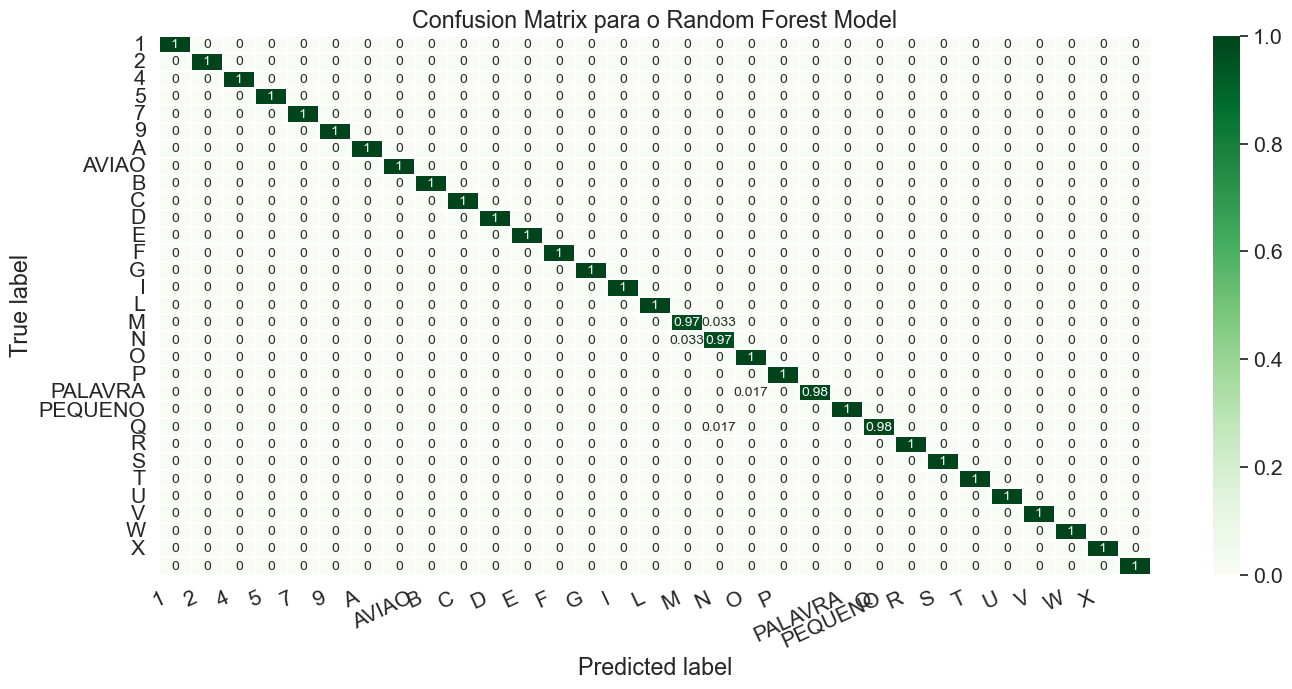

In [19]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Obter a matriz de confusão
matrix = confusion_matrix(y_test, y_predict)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Adicione as labels para a plotagem
class_names = [1, 2, 4, 5, 7, 9, 'A', 'AVIAO', 'B', 'C', 'D', 'E', 'F', 'G', 'I', 'L', 'M', 'N', 'O', 'P', 'PALAVRA', 'PEQUENO', 'Q','R','S','T', 'U', 'V', 'W', 'X']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix para o Random Forest Model')
plt.show()

* Mostra a quantidade, em porcentagem, de amostras que foram preditas corretamente

In [20]:
print('{}% das amostrar foram classificadas corretamente !'.format(score * 100))

99.67741935483872% das amostrar foram classificadas corretamente !


* Salva o modelo

In [ ]:
f = open('model_md7.p', 'wb')
pickle.dump({'model': model}, f)
f.close()